# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library

What we're going to cover:

0. An end-to-end Scikit_Learn workflow
1. Getting the data-ready
2. Choose the right estimator/algorithm/model for our problems
3. Fit the estimator/algorithm/model and use it to make predictions on our data
4. Evaluation a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get the data ready
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [4]:
# import warnings
# warnings.filterwarnings("default")

In [5]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.20 (default, Oct  3 2024, 15:19:54) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\tramb\OneDrive\Documents\Machine-Learning\Basics\sample_project_1\env\python.exe
   machine: Windows-10-10.0.26100-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 24.2
   setuptools: 75.1.0
        numpy: 1.24.3
        scipy: 1.10.1
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.7.2
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 6
         prefix: mkl_rt
       filepath: C:\Users\tramb\OneDrive\Documents\Machine-Learning\Basics\sample_project_1\env\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: vcomp
       filepath: C:\Users\tramb\OneDrive\Documents\Machine-Learning\Basics\sample_project_1\env\vcomp140.dll
        version: None


In [8]:
clf.fit(X_train, y_train);

In [9]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2


In [10]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3


In [11]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [12]:
y_test

267    0
292    0
121    1
200    0
8      1
      ..
239    0
58     1
78     1
195    0
159    1
Name: target, Length: 61, dtype: int64

In [13]:
# 4. Evaluate the model ot the training data and test data
clf.score(X_train, y_train)

1.0

In [14]:
clf.score(X_test, y_test)

0.8032786885245902

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71        22
           1       0.83      0.87      0.85        39

    accuracy                           0.80        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.80      0.80      0.80        61



In [16]:
confusion_matrix(y_test, y_preds)

array([[15,  7],
       [ 5, 34]], dtype=int64)

In [17]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [18]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 72.13%

Trying model with 20 estimators...
Model accuracy on test set: 75.41%

Trying model with 30 estimators...
Model accuracy on test set: 78.69%

Trying model with 40 estimators...
Model accuracy on test set: 80.33%

Trying model with 50 estimators...
Model accuracy on test set: 80.33%

Trying model with 60 estimators...
Model accuracy on test set: 77.05%

Trying model with 70 estimators...
Model accuracy on test set: 78.69%

Trying model with 80 estimators...
Model accuracy on test set: 78.69%

Trying model with 90 estimators...
Model accuracy on test set: 78.69%



In [19]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [20]:
loaded_model = pickle.load(open("random_forest_model_1.pk1","rb"))
loaded_model.score(X_test, y_test)

0.7868852459016393

# 1. Getting our data ready to be used with machine learning

Three main things we have to do
1. Split the data into features and labels (usually `X` & `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [26]:
X.shape[0] * 0.8

242.4

In [27]:
242 + 61

303

In [28]:
len(heart_disease)

303

### 1.1 Make sure its all numerical

In [29]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [31]:
len(car_sales)

1000

In [32]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [33]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# # Build machine learning model
# # from sklearn.ensemble import RandomForestRegressor # it can predict a number
# from sklearn.ensemble import RandomForestRegressor # it can predict a number

# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [35]:
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformedX = transformer.fit_transform(X)
transformedX

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [36]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [37]:
pd.DataFrame(transformedX)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [38]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]], dtype=int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [39]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformedX, y, test_size=0.2)

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=90)

In [40]:
clf.score(X_test, y_test)

0.0

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether.

In [41]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [42]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [44]:
# lets try and convert our data into numbers
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformedX = transformer.fit_transform(X)
transformedX

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [45]:
car_sales_missing # There are NaN values

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [46]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

#### Option 1: Fill missing data with Pandas

In [47]:
# Fill the "categorical features" columns
car_sales_missing["Make"].fillna("missing", inplace=True)

car_sales_missing["Colour"].fillna("missing", inplace=True)

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

car_sales_missing["Doors"].fillna(4, inplace=True)

In [48]:
# Check again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [49]:
# As price needs to be predicted so remove the rows, dont add missing values by yourself
car_sales_missing.dropna(inplace=True)

In [50]:
# Check again
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [51]:
len(car_sales_missing) # We have lost 50 samples

950

In [52]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [53]:
# lets try and convert our data into numbers
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformedX = transformer.fit_transform(car_sales_missing)
transformedX

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit_learn

In [54]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [55]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [56]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [57]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [58]:
# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [59]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [60]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_X_test = imputer.transform(X_test) # tranform takes the imputing missing values from the training set and fills the test set with them

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [61]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [62]:
# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [63]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [64]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [65]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators
* Classification problem - predicting a category (heart disease or not)
  * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

If you're working ona  machine learning problem, for model refer to this map:
https://scikit-learn.org/1.5/machine_learning_map.html

### 2.1 Picking a model for a regressing problem
Let's use the California Housing dataset

https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [66]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing;

In [67]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [68]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [69]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
# import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into traing and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)

# Check the score of model on the test set
model.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into traing and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of model on the test set
model.score(X_test, y_test)

### 2.2 Picking a ML model for a classification problem

In [ ]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

In [ ]:
len(heart_disease)

Consulting the map and it says to try `Linear SVC`

In [ ]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
# Import the RandonForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

### 3.1 Fitting the model to the data

In [ ]:
# Import the RandonForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

In [ ]:
X.head()

In [ ]:
y.tail()

### 3.2 Make predictions using a model

 2 ways to make predictions
1. predicate()
2. predict_proba() 

In [ ]:
# Use a trained model to make predictions
# clf.predict(np.array([1,7,8,3,4])); # Error

In [ ]:
X_test

In [ ]:
clf.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
# Compare predication to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

Make predictions with `predict_proba()`


In [ ]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

In [ ]:
clf.predict(X_test[:5])

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
X_test[:5]

`predict()` can also be used for regression models

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

In [ ]:
housing_df["target"]

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with `score` method

In [70]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
# The highest value for the score method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [72]:
clf.score(X_test, y_test)

0.8524590163934426

Lets's use the `score` method on our regression problem

In [73]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [74]:
model.score(X_test, y_test)

0.806652667101436

### 4.2 Evaluating a model using the `scoring` parameter

In [75]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [76]:
clf.score(X_test, y_test)

0.8524590163934426

In [77]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [78]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [79]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [80]:
# If scoring `None`, the estimator's default scorer (if available) is used.
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [81]:
# Scoring parameter is set to none by default
cross_val_score(clf, X, y, scoring=None)
# values would be different as we havent set seed in this cell

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. CLassification report

**Accuracy**

In [82]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [84]:
np.mean(cross_val_score)

0.8248087431693989

In [85]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under ROC (Receiver Operating Characteristic) curve**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model produces 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negarive = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [86]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [88]:
y_probs_positive = y_probs[:, 1] # column 1 of every row
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [89]:
 # Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

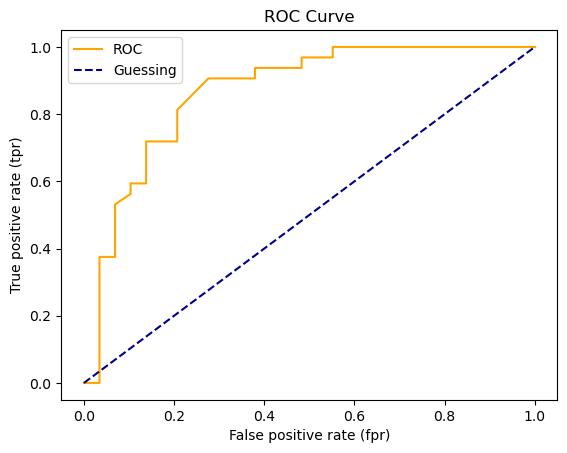

In [90]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROX curve given the fakse positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [91]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

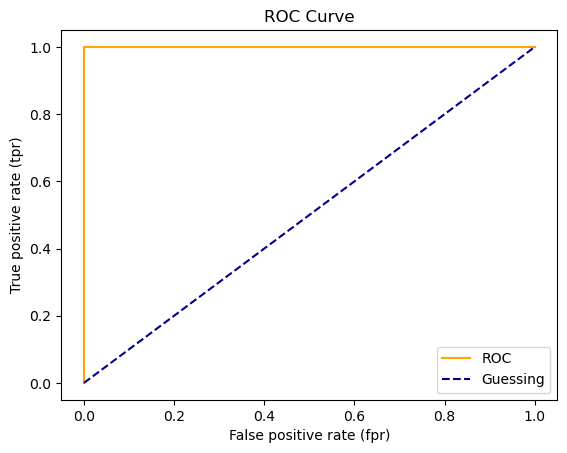

In [92]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [93]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, giving you an idea of where the model is getting confused

In [94]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [95]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [96]:
22 + 7 + 8 + 24

61

In [97]:
len(y_preds)

61

In [98]:
# to install a conda package from jupyter notebook that isn't in the environment
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



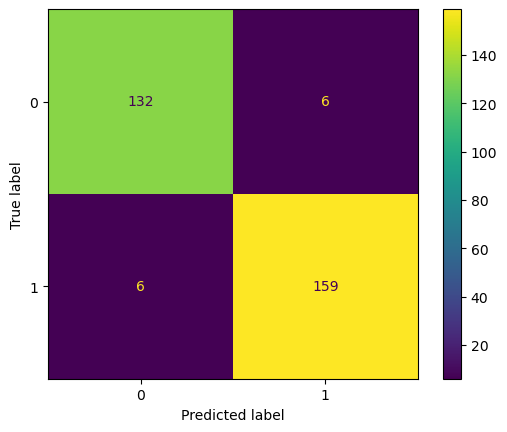

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay

# as we are passing X and y directly, so it make sthe predictions for you
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

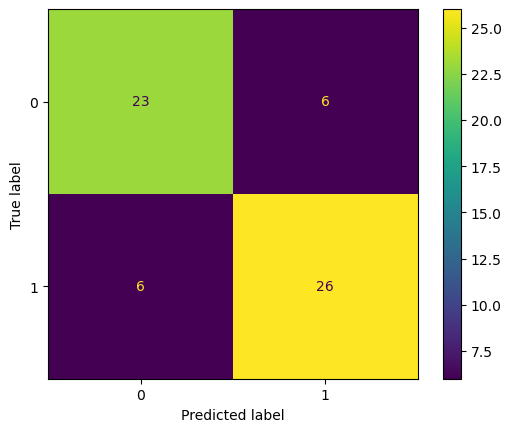

In [100]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

**Classification Report**

In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [102]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\tramb\OneDrive\Documents\Machine-Learning\Basics\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tramb\OneDrive\Documents\Machine-Learning\Basics\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tramb\OneDrive\Documents\Machine-Learning\Basics\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use 

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics

1. R^2 (r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [103]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [104]:
model.score(X_test, y_test)

0.806652667101436

In [105]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [106]:
y_test.mean()

2.0550030959302323

In [107]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [108]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [109]:
r2_score(y_true=y_test,
        y_pred=y_test_mean) # as its predicting mean, it will be 0

0.0

In [110]:
r2_score(y_true=y_test,
        y_pred=y_test) # as its perfect, it will be 1

1.0

**Mean absolute error**

It is the absolute differences between predictions and actual values.

It gives you an idea of how wrong your model's predictions are

In [111]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32656738464147306

In [112]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.660220,0.073220
7113,1.98200,2.343100,0.361100
7668,1.57500,1.663110,0.088110
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [113]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32656738464147306

**Mean squared error**

is the mean of the square of the errors between actual and predicted values

In [114]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.25336408094921037

In [115]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493900,0.016900,0.000286
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540240,0.354240,0.125486
9814,2.78000,2.331760,-0.448240,0.200919


In [116]:
 # Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.25336408094921037

In [117]:
df_large_error = df.copy();
df_large_error.iloc[0]["squared_differences"] = 16
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493900,0.016900,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540240,0.354240,0.125486
9814,2.78000,2.331760,-0.448240,0.200919


In [118]:
df_large_error["squared_differences"].mean()

0.25723998075298943

In [119]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493900,0.016900,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.219830,-0.413170,0.170709
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [120]:
df_large_error["squared_differences"].mean()

0.7333102979585939

### 4.2.3 Finally using the `scoring` parameter

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [122]:
np.random.seed(42)

# cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # If `None`, the estimator's default scorer (if available) is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [123]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [124]:
# just to check if its using accuracy by default
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [125]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [126]:
# Precision: A model which produces no false positives has a precision of 1.0
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

From above we can see that our model is doing better than another fold

In [127]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [128]:
# Recall: A model which produces no false negatives has a recall of 1.0
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [129]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


**Looks like our model is doing bettern in recall**

Let's see the `scoring` parameter being used for a regression problem...

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

In [131]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3)
np.mean(cv_r2)

0.6545660727379677

In [132]:
cv_r2

array([0.62156808, 0.72076221, 0.62136792])

In [133]:
# Mean absolute error
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.46281833778669723

In [134]:
cv_mse

array([-0.51821856, -0.3315067 , -0.53872975])

In [135]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.48201664304263575

In [136]:
cv_mae

array([-0.51737186, -0.42191774, -0.50676033])

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The third way to evaluate scikit-learn machine learning models/estimators is to using the sklearn.metrics

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [138]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.806652667101436
MAE: 0.32656738464147306
MSE: 0.25336408094921037


## 5. Improving a model

First predictions = baseline predictions

First model = baseline model

From a data prespective:
* Could we collect more data? (generally, the mode data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we can use?
* Could we improve the current model?

Hypreparameters vs Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [139]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [140]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets: training, validation and test

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [141]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
         "precision": round(precision, 2),
         "recall": round(recall, 2),
         "f1": round(f1, 2)
    }
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [142]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

# evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [143]:
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators=1000)
clf_2.fit(X_train, y_train)

y_preds = clf_2.predict(X_valid)

clf_2_metrics = evaluate_preds(y_valid, y_preds)
clf_2_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [144]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth" :[None, 5, 10, 20, 30],
    "max_features": ["log2", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf" : [1, 2, 4]
}

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearch, makes validation sets for us
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)
# Fit the RandomizedSearchCV version
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [145]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [146]:
# It will use the best one by default one for prediction
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV (like a bruteforce)

In [149]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['log2', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [152]:
ncross_validate = 5
number_of_models = 6*5*2*3*3*ncross_validate
number_of_models

2700

In [154]:
# how to avoid above stuff, because thats a lot of models
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['log2', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}
number_of_models = 3*1*2*1*2*ncross_validate
number_of_models

60

In [155]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV, makes validation sets for us
gs_clf = GridSearchCV(estimator=clf, 
                    param_grid=grid_2,
                    cv=5,
                    verbose=2)
# Fit the RandomizedSearchCV version
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, 

In [156]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [157]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [158]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


Let's compare our different models metrics.

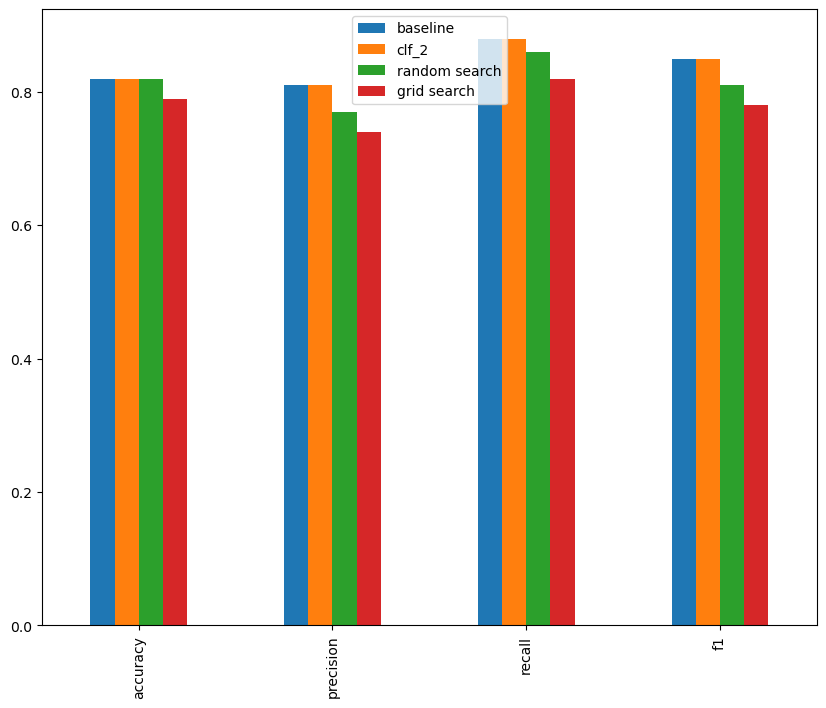

In [159]:
compare_metrics = pd.DataFrame({
    "baseline":baseline_metrics,
    "clf_2":clf_2_metrics,
    "random search":rs_metrics,
    "grid search":gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));